# Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
filePathTrain = '/content/drive/MyDrive/Indic Language Dataset/Hin_train.csv'
df_train = pd.read_csv(filePathTrain)
df_train.head()

,id,Link,Heading,Summary,Article
0,a3d72cd62e7e1b5529dd254a85fa2b5a,https://www.indiatv.in/india/national/india-su...,"भारत की बढ़ी ताकत, ‘अग्नि प्राइम’ मिसाइल का हु...",भारत ने शनिवार को ओडिशा के बालासोर तट पर ‘अग्न...,भुवनेश्वर : भारत ने शनिवार को ओडिशा के बालासोर...
1,f8904fd63c1d257dc5ee9b529df4a097,https://www.indiatv.in/india/national-covid-19...,Covid-19 Vaccination: देश में कोविड टीके की 40...,"केंद्रीय स्वास्थ्य मंत्रालय के मुताबिक, आज शाम...",नई दिल्ली। देश में कोरोना की संभावित तीसरी लहर...
2,4e89ee2300613ae0c0e8db4ed0e2c7aa,https://www.indiatv.in/india/uttar-pradesh/bjp...,यूपी में ब्राह्मण वोटरों को साधने की तैयारी कर...,"बीजेपी के केंद्र सरकार में ब्राह्मण मंत्रियों,...",बीजेपी यूपी में जनवरी के दूसरे हफ्ते से ब्राह्...
3,9a382557dc6afda0dfaf04210d16224f,https://www.indiatv.in/india/uttar-pradesh-si-...,बागपत में बिना इजाजत दाढ़ी रखने पर दरोगा सस्पे...,उत्तर प्रदेश के बागपत में बिना अनुमति के बड़ी ...,बागपत: उत्तर प्रदेश के बागपत में बिना अनुमति क...
4,928dcc9264915737630ab0e32f4a9b28,https://www.indiatv.in/india/politics-farm-law...,कृषि क़ानूनों की वापसी की घोषणा पर मैं अवाक रह...,उमा भारती ने कहा कि अगर तीन कृषि कानूनों की मह...,भोपाल: मध्य प्रदेश की पूर्व मुख्यमंत्री और बीज...


In [ ]:
df_train = df_train[['Article',  'Heading']]
df_train.head()

,Article,Heading
0,भुवनेश्वर : भारत ने शनिवार को ओडिशा के बालासोर...,"भारत की बढ़ी ताकत, ‘अग्नि प्राइम’ मिसाइल का हु..."
1,नई दिल्ली। देश में कोरोना की संभावित तीसरी लहर...,Covid-19 Vaccination: देश में कोविड टीके की 40...
2,बीजेपी यूपी में जनवरी के दूसरे हफ्ते से ब्राह्...,यूपी में ब्राह्मण वोटरों को साधने की तैयारी कर...
3,बागपत: उत्तर प्रदेश के बागपत में बिना अनुमति क...,बागपत में बिना इजाजत दाढ़ी रखने पर दरोगा सस्पे...
4,भोपाल: मध्य प्रदेश की पूर्व मुख्यमंत्री और बीज...,कृषि क़ानूनों की वापसी की घोषणा पर मैं अवाक रह...


In [ ]:
filePathTest = '/content/drive/MyDrive/Indic Language Dataset/Hin_val_article.csv'
df_test = pd.read_csv(filePathTest)
df_test = df_test[['Article']]
df_test.head()

,Article
0,जम्मू कश्मीर के पुलिस महानिदेशक (डीजीपी) दिलबा...
1,लखनऊ: समाजवादी पार्टी (सपा) ने तीन विवादास्पद ...
2,नई दिल्ली। भारत ने अपनी सैन्य शक्ति में इजाफा ...
3,चमोली: जल प्रलय ने उत्तराखंड के चमोली में जो व...
4,नई दिल्ली। भारत में नए वर्ष 2021 की शुरुआत हो ...


# Cleaning the Data

In [ ]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, ' ', data)

def preprocess_tokenize(text):
    # for removing punctuation from sentences
    text = str(text)
    text = re.sub(r'(\d+)', r'', text)

    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\t', ' ')
    text = text.replace('\u200d', '')
    text=re.sub("(__+)", ' ', str(text)).lower()   #remove _ if it occors more than one time consecutively
    text=re.sub("(--+)", ' ', str(text)).lower()   #remove - if it occors more than one time consecutively
    text=re.sub("(~~+)", ' ', str(text)).lower()   #remove ~ if it occors more than one time consecutively
    text=re.sub("(\+\++)", ' ', str(text)).lower()   #remove + if it occors more than one time consecutively
    text=re.sub("(\.\.+)", ' ', str(text)).lower()   #remove . if it occors more than one time consecutively
    text=re.sub(r"[<>()|&©@#ø\[\]\'\",;:?.~*!]", ' ', str(text)).lower() #remove <>()|&©ø"',;?~*!
    text = re.sub(r"[‘’।:]", " ", str(text)) #removing other special characters
    text = re.sub("([a-zA-Z])",' ',str(text)).lower()
    text = re.sub("(\s+)",' ',str(text)).lower()
    text = remove_emojis(text)
    return text

In [ ]:
df_train_target = df_train['Heading']
df_train_source = df_train['Article']

In [ ]:
tokenized_corpus_target = [preprocess_tokenize(x) for x in df_train_target]  #these are headlines
tokenized_corpus_source = [preprocess_tokenize(x) for x in df_train_source]  #these are articles

In [ ]:
print(tokenized_corpus_target[0])
print(tokenized_corpus_source[0])

भारत की बढ़ी ताकत अग्नि प्राइम मिसाइल का हुआ सफल परीक्षण मारक क्षमता से किलोमीटर
भुवनेश्वर भारत ने शनिवार को ओडिशा के बालासोर तट पर अग्नि प्राइम मिसाइल का सफल परीक्षण किया सरकारी अधिकारियों ने इसकी जानकारी दी अग्नि प्राइम मिसाइल अग्नि सीरीज की नए जनरेशन वाली एडवांस मिसाइल है इसकी मारक क्षमता से किलोमीटर के बीच है मिसाइल को रक्षा अनुसंधान और विकास संगठन द्वारा डिजाइन और विकसित किया गया है अग्नि प्राइम अल्ट्रा मॉर्डन टेक्निक से लैस होने की वजह से बहुत हल्के वजन की मिसाइल है आपको बता दें कि इसी सप्ताह भारत सुपरसोनिक मिसाइल असिस्टेड टॉरपीडो सिस्टम का भी सफलतापूर्वक प्रक्षेपण किया था इस मिसाइल का प्रक्षेपण ओडिशा तट से दूर अब्दुल कलाम द्वीप से किया गया था 


# Visualing Data

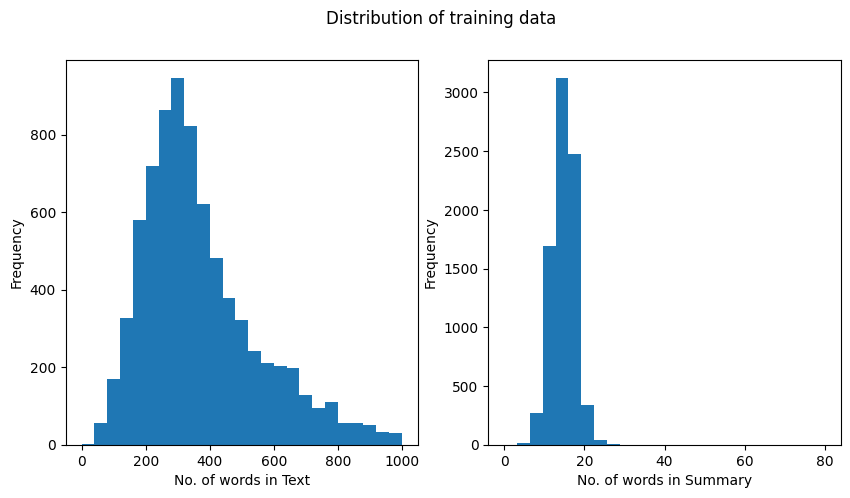

In [ ]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in tokenized_corpus_source[:df_train.shape[0]]:
      text_word_count.append(len(i.split()))

for i in tokenized_corpus_target[:df_train.shape[0]]:
      summary_word_count.append(len(i.split()))

fig , ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].hist(text_word_count, bins=25, range=[0, 1000])
ax[1].hist(summary_word_count, bins=25, range=[0, 80])
ax[0].set_xlabel("No. of words in Text")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("No. of words in Summary")
ax[1].set_ylabel("Frequency")
fig.suptitle('Distribution of training data')
plt.show()

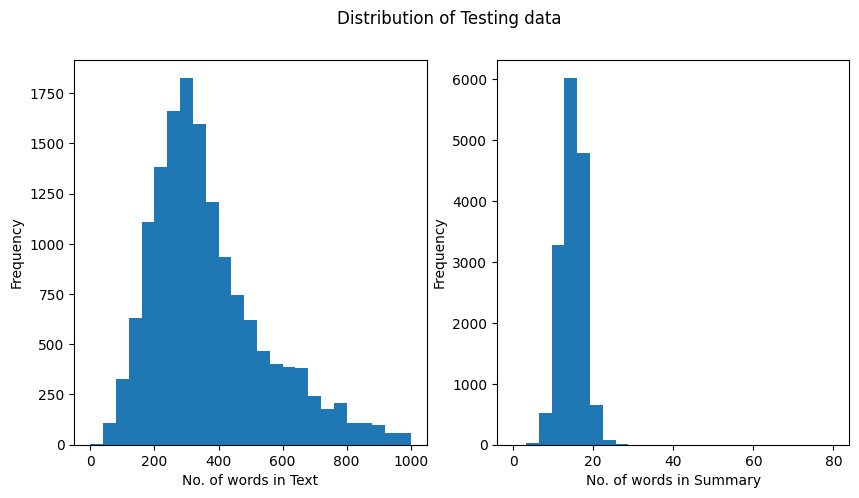

In [ ]:
for i in tokenized_corpus_source[:-df_test.shape[0]]:
      text_word_count.append(len(i.split()))

for i in tokenized_corpus_target[:-df_test.shape[0]]:
      summary_word_count.append(len(i.split()))

fig , ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].hist(text_word_count, bins=25, range=[0, 1000])
ax[1].hist(summary_word_count, bins=25, range=[0, 80])
ax[0].set_xlabel("No. of words in Text")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("No. of words in Summary")
ax[1].set_ylabel("Frequency")
fig.suptitle('Distribution of Testing data')
plt.show()

In [ ]:
news = df_train
news['Text_Cleaned'] = tokenized_corpus_source
print("::::: Text_Cleaned :::::")
print(news['Text_Cleaned'][0:5], "\n")


news['Summary_Cleaned'] =  tokenized_corpus_target
print("::::: Summary :::::")
print(news['Summary_Cleaned'][0:5], "\n")

corpus = list(news['Text_Cleaned'])

::::: Text_Cleaned :::::
0    भुवनेश्वर भारत ने शनिवार को ओडिशा के बालासोर त...
1    नई दिल्ली देश में कोरोना की संभावित तीसरी लहर ...
2    बीजेपी यूपी में जनवरी के दूसरे हफ्ते से ब्राह्...
3    बागपत उत्तर प्रदेश के बागपत में बिना अनुमति के...
4    भोपाल मध्य प्रदेश की पूर्व मुख्यमंत्री और बीजे...
Name: Text_Cleaned, dtype: object 

::::: Summary :::::
0    भारत की बढ़ी ताकत अग्नि प्राइम मिसाइल का हुआ स...
1     - देश में कोविड टीके की करोड़ से अधिक खुराक द...
2    यूपी में ब्राह्मण वोटरों को साधने की तैयारी कर...
3    बागपत में बिना इजाजत दाढ़ी रखने पर दरोगा सस्पे...
4    कृषि क़ानूनों की वापसी की घोषणा पर मैं अवाक रह...
Name: Summary_Cleaned, dtype: object 



In [ ]:
text_count = []
summary_count = []

for sent in news['Text_Cleaned']:
    text_count.append(len(sent.split()))
for sent in news['Summary_Cleaned']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame()
graph_df['text'] = text_count
graph_df['summary'] = summary_count

In [ ]:
graph_df['text'].describe()

count    7957.000000
mean      403.807842
std       267.977574
min        15.000000
25%       246.000000
50%       335.000000
75%       479.000000
max      3072.000000
Name: text, dtype: float64

In [ ]:
graph_df['summary'].describe()

count    7957.000000
mean       14.534247
std         2.931639
min         4.000000
25%        13.000000
50%        14.000000
75%        16.000000
max        29.000000
Name: summary, dtype: float64

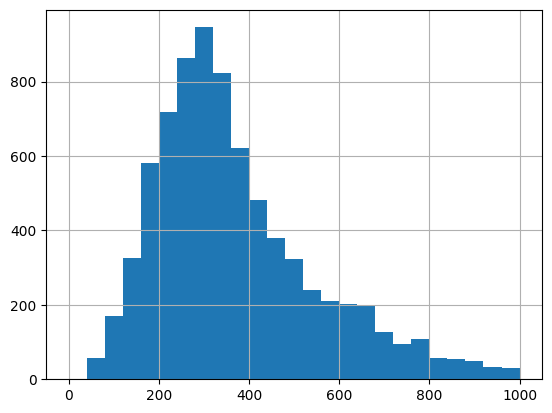

In [ ]:
graph_df['text'].hist(bins = 25, range=(0, 1000))
plt.show()

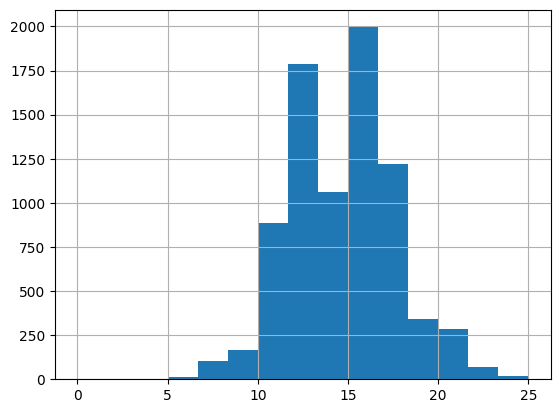

In [ ]:
graph_df['summary'].hist(bins = 15, range=(0, 25))
plt.show()

In [ ]:
max_text_len = 1000
max_summary_len = 25

In [ ]:
cleaned_text = np.array(news['Text_Cleaned'])
cleaned_summary = np.array(news['Summary_Cleaned'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split()) <= max_summary_len
       and len(cleaned_summary[i].split()) > 1
       and len(cleaned_text[i].split()) <= max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
    elif((len(cleaned_summary[i].split()) > max_summary_len) or (len(cleaned_text[i].split()) > max_text_len)):
        summ = cleaned_summary[i].split()
        txt = cleaned_text[i].split()
        if(len(summ)>max_summary_len):
          short_summary.append(' '.join(summ[:max_summary_len]))
        else:
          short_summary.append(cleaned_summary[i])
        if(len(txt)>max_text_len):
          short_text.append(' '.join(txt[:max_text_len]))
        else:
          short_text.append(cleaned_text[i])

post_pre = pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')
post_pre['text'] = post_pre['text'].apply(lambda x: 'sostok ' + x + ' eostok')
cleaned_summary = np.array(post_pre['summary'])
cleaned_text = np.array(post_pre['text'])
print("Cleaned Text's size -", cleaned_text.shape[0])
print("Cleaned Summary's size -", cleaned_summary.shape[0])

Cleaned Text's size - 7957
Cleaned Summary's size - 7957


# Tokenization, Padding and Saving Final Input File

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
#Tokenize text to get the vocab count
#prepare a tokenizer for training data
text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(list(cleaned_text))

#prepare a tokenizer for reviews on training data
summary_tokenizer = Tokenizer()
summary_tokenizer.fit_on_texts(list(cleaned_summary))

In [ ]:
vocab = text_tokenizer.word_index
import random
def sample_from_dict(d, sample=10):
    keys = random.sample(list(d), sample)
    values = [d[k] for k in keys]
    return dict(zip(keys, values))

print(sample_from_dict(vocab))
print("Length of Vocab -", len(vocab))

{'कुमानम': 44778, 'बासा': 46250, 'उथलपुथल': 24121, 'लीवर': 6769, 'गूढ़': 19507, 'ब्राजीलियाई': 22013, 'मित्रवत': 25926, 'ठा': 14556, 'टाडा': 30407, 'इलाक़ा': 39828}
Length of Vocab - 50667


In [ ]:
thresh=4
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in text_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary in Text:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words in Text:",(freq/tot_freq)*100)

% of rare words in vocabulary in Text: 63.412082815244645
Total Coverage of rare words in Text: 1.5382609609641984


In [ ]:
# #prepare a tokenizer for reviews on training data
text_tokenizer = Tokenizer(num_words = tot_cnt - cnt)
text_tokenizer.fit_on_texts(list(cleaned_text))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
text__seq    =   text_tokenizer.texts_to_sequences(cleaned_text)
#padding zero upto maximum length
cleaned_text    =   pad_sequences(text__seq,  maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
text_voc   =  text_tokenizer.num_words + 1

print("Size of vocabulary in Text = {}".format(text_voc))

Size of vocabulary in Text = 18539


In [ ]:
thresh=4
cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in summary_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary in Summary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words in Summary:",(freq/tot_freq)*100)

% of rare words in vocabulary in Summary: 68.35260115606935
Total Coverage of rare words in Summary: 7.785197298688713


In [ ]:
#prepare a tokenizer for reviews on training data
summary_tokenizer = Tokenizer(num_words = tot_cnt - cnt)
summary_tokenizer.fit_on_texts(list(cleaned_summary))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
summary__seq    =   summary_tokenizer.texts_to_sequences(cleaned_summary)
#padding zero upto maximum length
cleaned_summary    =   pad_sequences(summary__seq,  maxlen=max_summary_len, padding='post')

#size of vocabulary ( +1 for padding token)
summary_voc   =  summary_tokenizer.num_words + 1

print("Size of vocabulary in Summary = {}".format(summary_voc))

Size of vocabulary in Summary = 3286


In [ ]:
summary_tokenizer.word_counts['sostok'], len(cleaned_summary)

(7957, 7957)

In [ ]:
import pickle
pathToFolder = '/content/drive/MyDrive/Languages/Hindi Language Text Summarization/'
with open(pathToFolder + 'text_tokenizer.pickle', 'wb') as handle:
    pickle.dump(text_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(pathToFolder + 'summary_tokenizer.pickle', 'wb') as handle:
    pickle.dump(summary_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
ind=[]
for i in range(len(cleaned_summary)):
    cnt=0
    for j in cleaned_summary[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

cleaned_text = np.delete(cleaned_text, ind, axis=0)
cleaned_summary = np.delete(cleaned_summary, ind, axis=0)

In [ ]:
print("cleaned text's size ",cleaned_text.shape)
print("cleaned summary's size ",cleaned_summary.shape)

cleaned text's size  (7957, 1000)
cleaned summary's size  (7957, 25)


In [ ]:
cleaned_text

array([[   40,  2227,    43, ...,     0,     0,     0],
       [   40,    86,    33, ...,     0,     0,     0],
       [   40,   231,   249, ...,     0,     0,     0],
       ...,
       [   40,    86,    33, ...,     0,     0,     0],
       [   40, 17364,    77, ...,     0,     0,     0],
       [   40,    77,    49, ...,     0,     0,     0]], dtype=int32)

In [ ]:
cleaned_summary

array([[  1,  23,   5, ...,   0,   0,   0],
       [  1,  41,   3, ...,   0,   0,   0],
       [  1,  38,   3, ...,   0,   0,   0],
       ...,
       [  1,  41,   3, ...,   0,   0,   0],
       [  1,   6,   8, ...,   0,   0,   0],
       [  1, 319, 145, ...,   0,   0,   0]], dtype=int32)

In [ ]:
#Saving Final Input Text
with open(pathToFolder + 'cleaned_text.pickle', 'wb') as file:
    pickle.dump(cleaned_text, file, protocol=pickle.HIGHEST_PROTOCOL)

with open(pathToFolder + 'cleaned_summary.pickle', 'wb') as file:
    pickle.dump(cleaned_summary, file, protocol=pickle.HIGHEST_PROTOCOL)

# Embedding Space

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199773 sha256=40e2c42a31dba708546e8492cfcef43f0d9d8cffdd7e7672884ab646f67661e3
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [ ]:
# 'fastText' is a library for learning of word embeddings and text classification created by Facebook's (Meta) AI Research lab.
import fasttext.util

# Link to fastText Models for different Languages: https://fasttext.cc/docs/en/crawl-vectors.html
# !gzip -d /content/drive/MyDrive/fastText/cc.hi.300.bin.gz

In [ ]:
ft = fasttext.load_model('/content/drive/MyDrive/fastText/cc.hi.300.bin')

In [ ]:
word = "खुशी"
print("Embedding vector shape of", word, " is {}".format(ft.get_word_vector(word).shape[0]))

Embedding vector shape of खुशी  is 300


# Embedding Matrix

In [ ]:
def create_weight_matrix(model, DICT_SIZE, tokenizer):
  '''
  Accepts word embedding model and the second model, if provided returns weight matrix of size m*n, where
  m - size of the dictionary
  n - size of the word embedding vector
  '''
  vector_size = model.get_word_vector("खुशी").shape[0]
  w_matrix = np.zeros((DICT_SIZE, vector_size))
  unk_words = []
  text_words = []
  for word, index in tokenizer.word_index.items():
    if index < DICT_SIZE:
      if word in model.words:
        w_matrix[index] = model.get_word_vector(word)
        text_words.append(word)
      else:
        w_matrix[index] = np.random.rand(1, vector_size)
        unk_words.append(word)


  print('{} words were considered as they were found in embedding space:'.format(len(text_words)))
  print('{} are some such words'.format(text_words[:10]))
  print()
  print('{} words were randomly alloted as they were not found in embedding space:'.format(len(unk_words)))
  print('{} are some such words'.format(unk_words[:10]))

  return w_matrix

In [ ]:
text_matrix = create_weight_matrix(ft, text_voc, text_tokenizer)

18114 words were considered as they were found in embedding space:
['के', 'में', 'की', 'है', 'को', 'से', 'ने', 'और', 'कि', 'का'] are some such words

424 words were randomly alloted as they were not found in embedding space:
['sostok', 'eostok', 'कोविड', 'कोवैक्सीन', 'कोविशील्ड', 'सिंघू', 'ओमीक्रोन', 'गलवान', 'रेमडेसिविर', 'पृथकवास'] are some such words


In [ ]:
summ_matrix = create_weight_matrix(ft, summary_voc, summary_tokenizer)

3273 words were considered as they were found in embedding space:
['में', 'के', 'की', 'ने', 'से', 'को', 'का', 'पर', 'और', 'कोरोना'] are some such words

12 words were randomly alloted as they were not found in embedding space:
['sostok', 'eostok', 'कोविड', 'कोवैक्सीन', 'गलवान', 'कोविशील्ड', 'सिंघू', 'रोहिंग्याओं', 'पैगसस', 'रेमडेसिविर'] are some such words


In [ ]:
with open(pathToFolder + 'text_matrix.pickle', 'wb') as handle:
    pickle.dump(text_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(pathToFolder + 'summ_matrix.pickle', 'wb') as handle:
    pickle.dump(summ_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Modelling

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import time
import re
import pickle
import matplotlib.pyplot as plt

In [ ]:
BUFFER_SIZE = 20000
BATCH_SIZE = 16

In [ ]:
with open(pathToFolder + 'cleaned_text.pickle', 'rb') as handle:
    cleaned_text = pickle.load(handle)
with open(pathToFolder + 'cleaned_summary.pickle', 'rb') as handle:
    cleaned_summary = pickle.load(handle)

cleaned_text.shape

(7957, 1000)

In [ ]:
x_train, y_train = cleaned_text[:cleaned_text.shape[0]-df_test.shape[0], :], cleaned_summary[:cleaned_summary.shape[0]-df_test.shape[0], :]
x_test, y_test = cleaned_text[:-df_test.shape[0], :], cleaned_summary[:-df_test.shape[0], :]

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

In [ ]:
def get_angles(position, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return position * angle_rates

In [ ]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis],
        np.arange(d_model)[np.newaxis, :],
        d_model
    )

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

In [ ]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]

In [ ]:
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

# Building the Model

Scalar Dot Product

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)

    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    output = tf.matmul(attention_weights, v)
    return output, attention_weights

Multi-Head Attention

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        output = self.dense(concat_attention)

        return output, attention_weights

Feed Forwrad Network

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

Single Encoder Layer

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

Single Decoder Layer

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)


    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)

        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)

        return out3, attn_weights_block1, attn_weights_block2

Encoder

In [ ]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, emb_matrix, max_len, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_dim = input_vocab_size,
                      output_dim = d_model,
                      input_length = max_len, # max_len of text sequence - 300
                      weights=[emb_matrix],
                      trainable=False) # static weights to be assigned from pretrained embedding
        #self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)

        return x

Decoder

In [ ]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, emb_matrix, max_len, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        #self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.embedding = tf.keras.layers.Embedding(input_dim = target_vocab_size,
                      output_dim = d_model,
                      input_length = max_len, # max_len of summ sequence - 16
                      weights=[emb_matrix],
                      trainable=False)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)

    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2

        return x, attention_weights

Transformer Model

In [ ]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, text_matrix, max_len_text, summ_matrix, max_len_summ, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, text_matrix, max_len_text, rate)
        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, summ_matrix, max_len_summ, rate)
        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training, enc_padding_mask)
        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)
        final_output = self.final_layer(dec_output)

        return final_output, attention_weights

# Training

In [ ]:
with open(pathToFolder + 'text_matrix.pickle', 'rb') as handle:
    text_matrix = pickle.load(handle)
with open(pathToFolder + 'summ_matrix.pickle', 'rb') as handle:
    summ_matrix = pickle.load(handle)

In [ ]:
# hyper-params
num_layers = 4
d_model = text_matrix.shape[1]
dff = 512
num_heads = 10
EPOCHS = 20
max_len_text = 1000
max_len_summ = 25

In [ ]:
encoder_vocab_size = text_voc
decoder_vocab_size = summary_voc

In [ ]:
# Custom Scheduler
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, dtype=tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        self.step = tf.cast(step, dtype=tf.float32)
        arg1 = tf.math.rsqrt(self.step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Text(0.5, 0, 'Train Step')

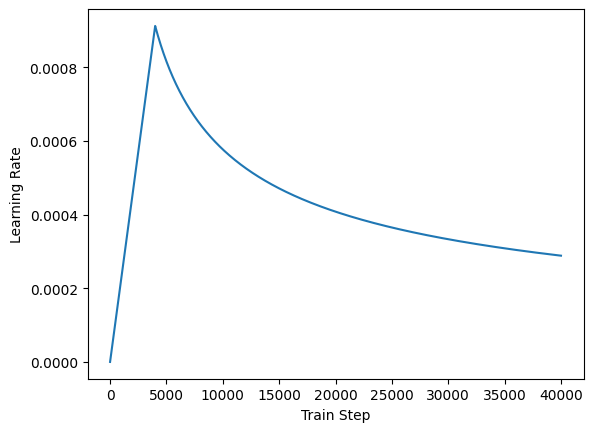

In [ ]:
temp_learning_rate_schedule = CustomSchedule(d_model)

plt.plot(temp_learning_rate_schedule(tf.range(40000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [ ]:
# Creating Adam Optimizer with Custom Learning Rate
learning_rate = 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
val_loss = tf.keras.metrics.Mean(name='val_loss')

In [ ]:
transformer = Transformer(
    num_layers,
    d_model,
    num_heads,
    dff,
    encoder_vocab_size,
    decoder_vocab_size,
    pe_input = encoder_vocab_size,
    pe_target = decoder_vocab_size,
    text_matrix = text_matrix,
    max_len_text = max_len_text,
    summ_matrix = summ_matrix,
    max_len_summ = max_len_summ
)

In [ ]:
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)

    return enc_padding_mask, combined_mask, dec_padding_mask

In [ ]:
checkpoint_path = pathToFolder + "checkpoints"

ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

Latest checkpoint restored!!


In [ ]:
# Training
@tf.function
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp,
            True,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask
        )
        loss = loss_function(tar_real, predictions)

    gradients = tape.gradient(loss, transformer.trainable_variables)
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)

In [ ]:
# Validation
@tf.function
def val_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp,
            False,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask
        )
        loss = loss_function(tar_real, predictions)
    val_loss(loss)

In [ ]:
train_loss_values = []
test_loss_values = []
for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()
    val_loss.reset_states()
    #training set - forward prop, loss fn, (gradient descent and optimization) backprop
    for (batch, (inp, tar)) in enumerate(dataset):
        train_step(inp, tar)

        # 85k samples
        # we display 3 batch results -- 0th, middle and last one (approx)
        # 85k / 64 ~ 1328; 1328 / 2 ~ 664
        if batch % 2601 == 0:
            print ('Epoch {} ========> Batch {} Loss {:.4f}'.format(epoch + 1, batch, train_loss.result().numpy()))

    if (epoch + 1) % 2 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))

    train_loss_values.append(train_loss.result().numpy())

    #test set - forward pass, loss fn (no backward pass)
    for (batch, (inp, tar)) in enumerate(test_dataset):
        val_step(inp, tar)

    test_loss_values.append(val_loss.result().numpy())

    print ('Epoch {}/{} ========> Training Loss {:.4f} Test/Validation Loss {:.4f}'.format(epoch + 1, EPOCHS, train_loss.result().numpy(), val_loss.result().numpy()))

    print ('Time taken for epoch {}: {:.2f} secs\n'.format(epoch+1, time.time() - start))

InvalidArgumentError: in user code:

    File "<ipython-input-151-27c1bfca62e0>", line 10, in train_step  *
        predictions, _ = transformer(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
        raise e.with_traceback(filtered_tb) from None

    InvalidArgumentError: Exception encountered when calling layer 'transformer_6' (type Transformer).
    
    in user code:
    
        File "<ipython-input-61-39e0f6ed1fbf>", line 10, in call  *
            enc_output = self.encoder(inp, training, enc_padding_mask)
        File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
    
        InvalidArgumentError: Exception encountered when calling layer 'encoder_6' (type Encoder).
        
        in user code:
        
            File "<ipython-input-59-c29993253f3e>", line 23, in call  *
                x = self.embedding(x)
            File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler  **
                raise e.with_traceback(filtered_tb) from None
            File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 4359, in _assign_value_to_variable
                variable.assign(value)
        
            InvalidArgumentError: {{function_node __wrapped__AssignVariableOp_device_/job:localhost/replica:0/task:0/device:GPU:0}} Trying to assign to variable with tensor with wrong shape. Expected [15587,300] got [18539,300] [Op:AssignVariableOp] name: 
        
        
        Call arguments received by layer 'encoder_6' (type Encoder):
          • x=tf.Tensor(shape=(16, 1000), dtype=int32)
          • training=True
          • mask=tf.Tensor(shape=(16, 1, 1, 1000), dtype=float32)
    
    
    Call arguments received by layer 'transformer_6' (type Transformer):
      • inp=tf.Tensor(shape=(16, 1000), dtype=int32)
      • tar=tf.Tensor(shape=(16, 24), dtype=int32)
      • training=True
      • enc_padding_mask=tf.Tensor(shape=(16, 1, 1, 1000), dtype=float32)
      • look_ahead_mask=tf.Tensor(shape=(16, 1, 24, 24), dtype=float32)
      • dec_padding_mask=tf.Tensor(shape=(16, 1, 1, 1000), dtype=float32)


In [ ]:
no_of_epochs = [i for i in range(EPOCHS)]
fig , ax = plt.subplots(1,1)
fig.set_size_inches(7,4)
ax.plot(no_of_epochs, test_loss_values, label = 'Testing Loss')
ax.plot(no_of_epochs, train_loss_values, label = 'Training Loss')
ax.set_title('Categorical Crossentropy Loss vs No. of Epochs')
ax.legend()
ax.set_xlabel("No. of Epochs")
plt.show()

In [ ]:
with open(pathToFolder + 'text_tokenizer.pickle', 'rb') as handle:
    text_tokenizer = pickle.load(handle)
with open(pathToFolder + 'summary_tokenizer.pickle', 'rb') as handle:
    summary_tokenizer = pickle.load(handle)
max_text_len = 300
max_summary_len = 16

In [ ]:
def predict(input_document):
    # #clean
    #input_document = preprocess_tokenize(input_document)
    input_document = "sostok "+input_document+" eostok"
    #tokenize
    input_document = text_tokenizer.texts_to_sequences([input_document])
    #padding
    input_document = tf.keras.preprocessing.sequence.pad_sequences(input_document, maxlen=max_text_len, padding='post', truncating='post')

    encoder_input = tf.expand_dims(input_document[0], 0)

    decoder_input = [summary_tokenizer.word_index["sostok"]]
    output = tf.expand_dims(decoder_input, 0)

    for i in range(max_summary_len):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)

        predictions, attention_weights = transformer(
            encoder_input,
            output,
            False,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask,
        )

        predictions = predictions[: ,-1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if predicted_id == summary_tokenizer.word_index["eostok"]:
            return tf.squeeze(output, axis=0), attention_weights

        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weights

In [ ]:
def summarize(input_document):
    # not considering attention weights for now, can be used to plot attention heatmaps in the future
    summarized = predict(input_document=input_document)[0].numpy()
    summarized = np.expand_dims(summarized[1:], 0)  # not printing <go> token
    return summary_tokenizer.sequences_to_texts(summarized)[0]  # since there is just one translated document

In [ ]:
summarize("पूर्व प्रधानमंत्री और कांग्रेस के दिग्गज नेता राजीव गांधी की आज 75वीं जयंती है. इस मौके पर कांग्रेस अध्यक्ष राहुल गांधी, यूपीए चेयरपर्सन सोनिया गांधी, प्रियंका गांधी, पूर्व प्रधानमंत्री मनमोहन सिंह समेत कई बड़े कांग्रेस नेताओं ने उन्हें श्रद्धांजलि अर्पित की. प्रधानमंत्री नरेंद्र मोदी ने भी ट्वीट कर उन्हें श्रद्धांजलि दी. बता दें कि राजीव गांधी का जन्म आज ही के दिन 1944 में हुआ था. 21 मई, 1991 को उनकी हत्या कर दी गई थी. राजीव गांधी 1984 से 1989 तक प्रधानमंत्री रहे. तमिलनाडु के श्रीपेरंबुदुर में 21 मई, 1991 को आम चुनाव के प्रचार के दौरान एलटीटीई के एक आत्मघाती हमलावर ने राजीव गांधी की हत्या कर दी थी. 1984 में इंदिरा गांधी की हत्या के बाद वह भारी बहुमत के साथ प्रधानमंत्री बने. राजीव गांधी की राजनीति में कोई रूचि नहीं थी और वो एक एयरलाइन पायलट की नौकरी करते थे और उसी में खुश थे. लेकिन आपातकाल के उपरान्त जब इंदिरा गांधी को सत्ता छोड़नी पड़ी थी. वहीं साल 1980 में छोटे भाई संजय गांधी की हवाई जहाज दुर्घटना में मृत्यु हो जाने के बाद माता इंदिरा का सहयोग देने के लिए उन्होंने राजनीति में प्रवेश कर लिया.")

# Testing

In [ ]:
documents = df_train['Article']
summary = df_train['Heading']

In [ ]:
samples = [17, 35, 69, 21, 26]
docs = []
summ = []
pred = []
for i in samples:
  pred.append(summarize(documents[i]))
  docs.append(' '.join(documents[i].split(' ')[:100]))
  summ.append(summary[i])


result_df = pd.DataFrame({'Input': docs, 'Reference Summary': summ, 'Model Output Summary': pred})
result_df[['Input', 'Reference Summary', 'Model Output Summary']] #17, 69, 21, 26, 35
result_df.style.set_properties(subset=['Input'], **{'width': '400px'})

# Evaluation Metrics

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge
rouge = Rouge()

summary = result_df['Model Output Summary']
reference = result_df['Reference Summary']

rouge_score = rouge.get_scores(summary,reference)
rouge_score
# plt.plot(rouge_score)

In [ ]:
import matplotlib.pyplot as plt
rouge_1, rouge_2, rouge_l = [], [], []

for r in rouge_score:
  for key, value in r.items():
    if key == 'rouge-1':
      rouge_1.append(value)
    elif key == 'rouge-2':
      rouge_2.append(value)
    elif key == 'rouge-l':
      rouge_l.append(value)

# Plotting the scores
def plotRougeScore(rouge, title):
  fig, ax = plt.subplots(1,5)
  fig.set_size_inches(15,3)
  i=0
  for r1 in rouge:
      ax[i].bar(r1.keys(), r1.values())
      ax[i].set_ylim(0, 1)
      ax[i].set_title(title)
      i+=1
  plt.show()

plotRougeScore(rouge_1, 'Rouge-1 Score')
plotRougeScore(rouge_2, 'Rouge-2 Score')
plotRougeScore(rouge_l, 'Rouge-l Score')